In [1]:
import pandas as pd
import numpy as np
import random
from preprocess_df import process_df
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.manifold import LocallyLinearEmbedding

In [2]:
#normal_data
normal_df = pd.read_csv('data/normal1.csv')
processed_normal = process_df(normal_df)

# attack_data
attack_df = pd.read_csv('data/attack1.csv')
processed_attack = process_df(attack_df)

In [3]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=30, n_iter=5)
svd_normal = svd.fit_transform(processed_normal.values)
svd_attack = svd.fit_transform(processed_attack.values)

In [4]:
from sklearn.model_selection import train_test_split

x_normal_train, x_normal_test = train_test_split(
    svd_normal, test_size=0.2, random_state=42)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(20, input_dim=svd_normal.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='relu')) # size to compress to
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(svd_normal.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_normal_train,x_normal_train,verbose=1,epochs=30)

Epoch 1/30


2022-03-18 19:59:25.858255: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-18 19:59:26.002919: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3514/3514 [==============================] - 19s 5ms/step - loss: 0.6283
Epoch 2/30
3514/3514 [==============================] - 16s 5ms/step - loss: 0.4308
Epoch 3/30
3514/3514 [==============================] - 16s 5ms/step - loss: 0.3889
Epoch 4/30
3514/3514 [==============================] - 17s 5ms/step - loss: 0.3689
Epoch 5/30
3514/3514 [==============================] - 17s 5ms/step - loss: 0.3551
Epoch 6/30
3514/3514 [==============================] - 16s 5ms/step - loss: 0.3453
Epoch 7/30
3514/3514 [==============================] - 16s 5ms/step - loss: 0.3376
Epoch 8/30
3514/3514 [==============================] - 17s 5ms/step - loss: 0.3299
Epoch 9/30
3514/3514 [==============================] - 17s 5ms/step - loss: 0.3233
Epoch 10/30
3514/3514 [==============================] - 16s 5ms/step - loss: 0.3186
Epoch 11/30
3514/3514 [==============================] - 17s 5ms/step - loss: 0.3156
Epoch 12/30
3514/3514 [==============================] - 17s 5ms/step - loss: 0.3134


In [7]:
model.save('svd_auto4')

INFO:tensorflow:Assets written to: svd_auto4/assets


2022-03-18 20:08:03.044644: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [9]:
from sklearn import metrics
pred_normal_train = model.predict(x_normal_train)
print(np.sqrt(metrics.mean_squared_error(pred_normal_train,x_normal_train)))

0.5421816144795171


In [10]:
pred_normal_test = model.predict(x_normal_test)
print(np.sqrt(metrics.mean_squared_error(pred_normal_test,x_normal_test)))

0.5443463584616373


In [12]:
pred_attack = model.predict(svd_attack)

score_list = []
for index, x in enumerate(pred_attack):
    score_list.append(np.sqrt(metrics.mean_squared_error(pred_attack[index],svd_attack[index])))

attack_df['score'] = score_list

<AxesSubplot:>

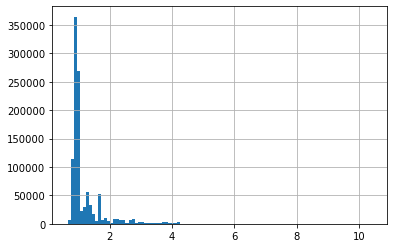

In [13]:
attack_df['score'].hist(bins = 100)

In [14]:
nmap_df = attack_df[attack_df["ip.dst"] == '89.100.107.148']

<AxesSubplot:>

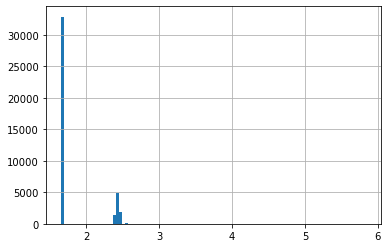

In [15]:
nmap_df['score'].hist(bins = 100)

In [20]:
nmap_df['score'].min()

1.655213625992294

In [21]:
normal_wordpress = attack_df[attack_df["ip.dst"] == '89.100.107.147']

<AxesSubplot:>

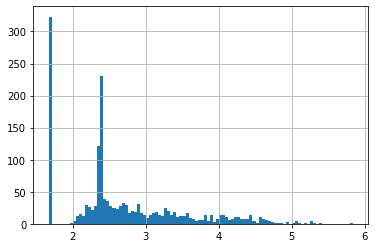

In [23]:
normal_wordpress['score'].hist(bins=100)